In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

SVM Accuracy: 0.6055555555555555


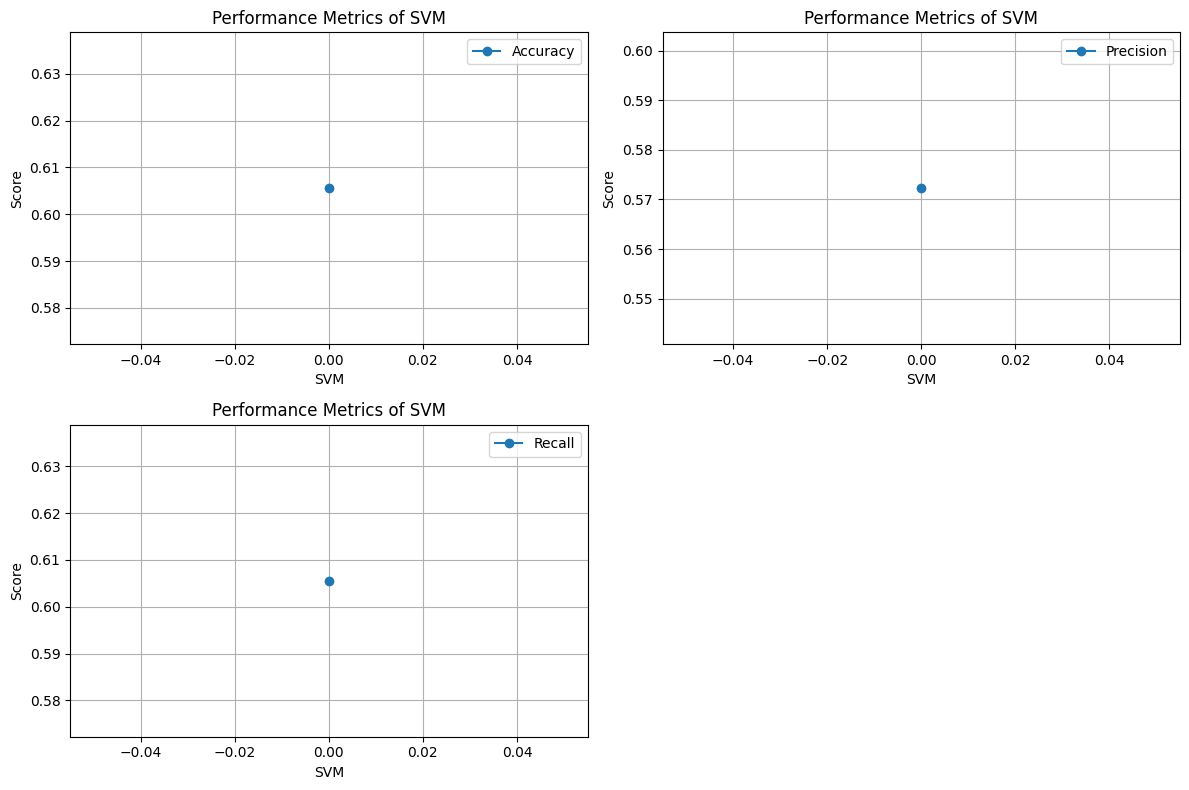

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.38333333333333336


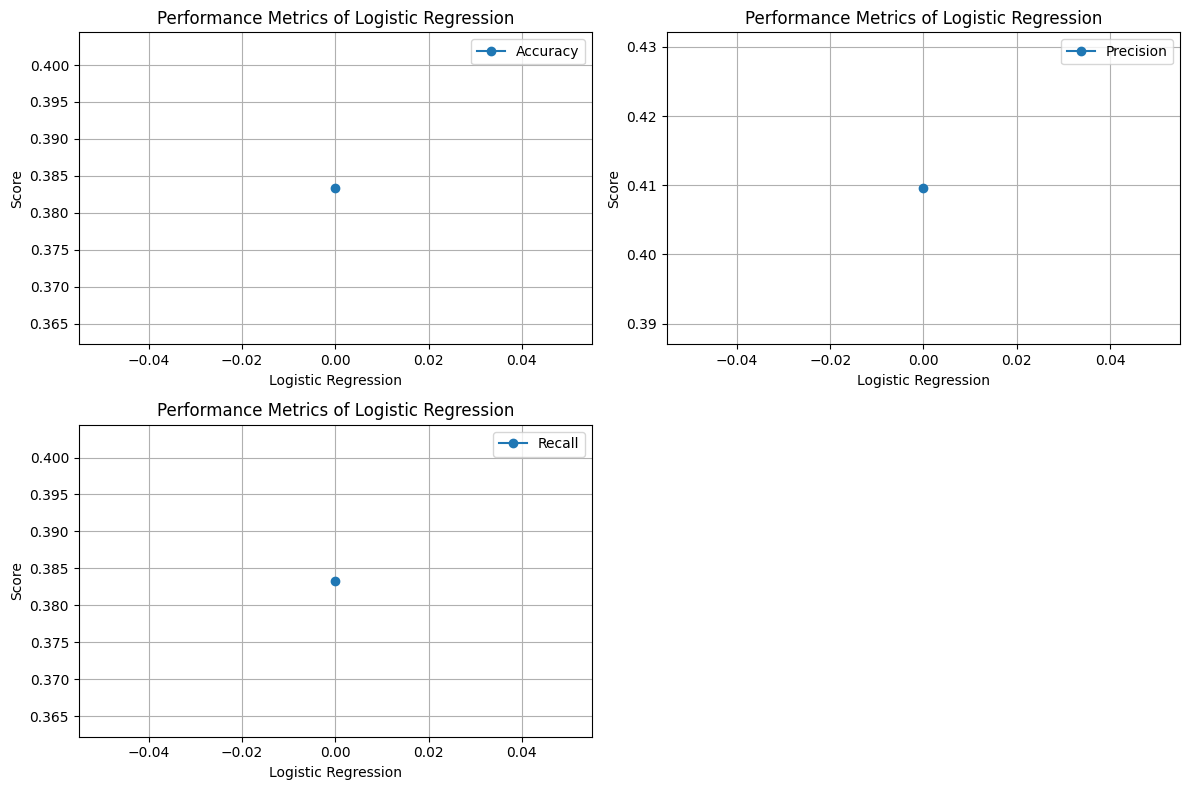

K-Nearest Neighbors (KNN) Accuracy: 0.35


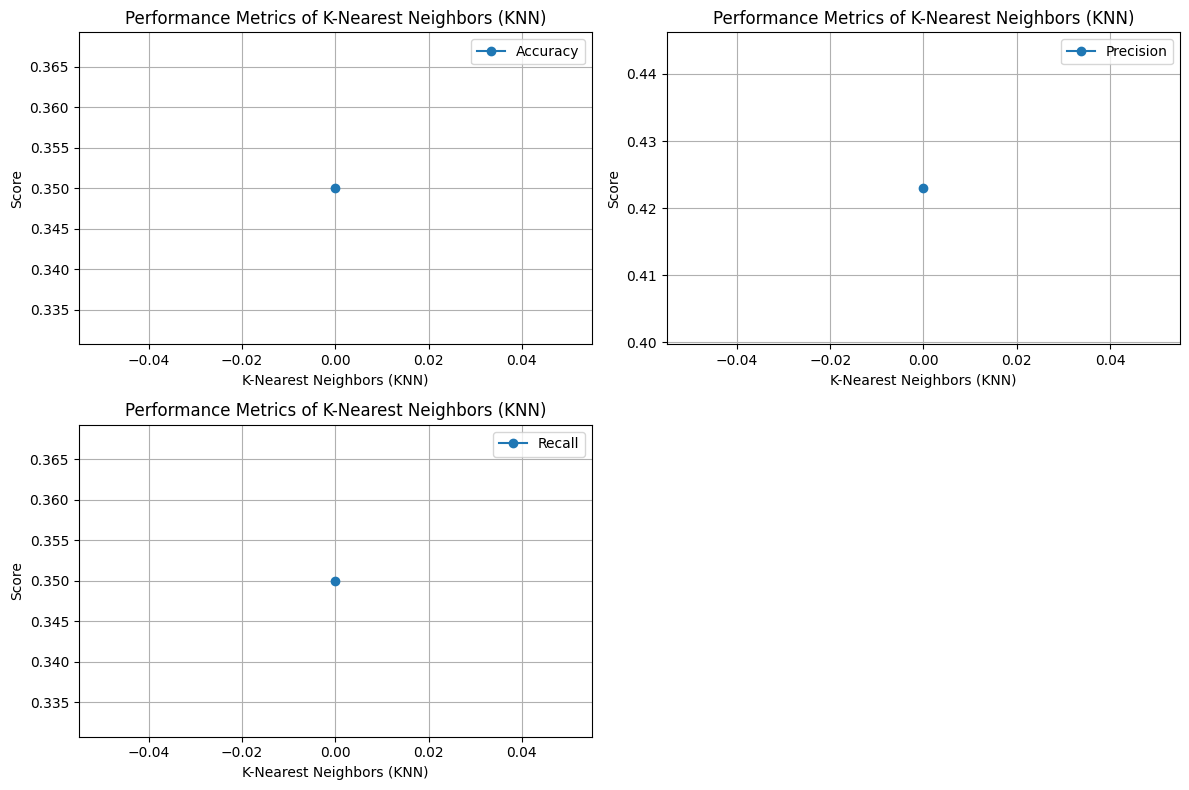

Random Forest Accuracy: 0.6361111111111111


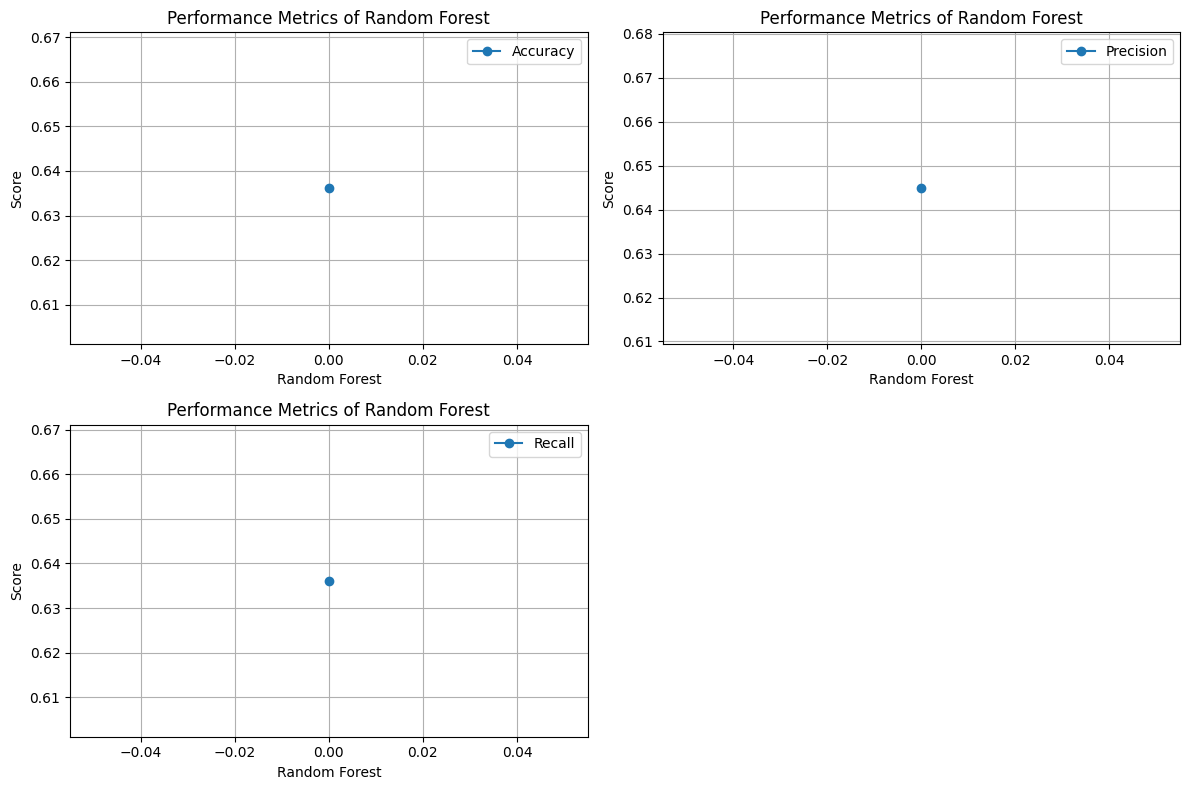

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
16/45 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1451 - loss: 2.2227

W0000 00:00:1715352657.557581     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1748 - loss: 2.0191

W0000 00:00:1715352658.650734     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.1815 - loss: 1.9875 - val_accuracy: 0.3056 - val_loss: 1.4765
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4810 - loss: 1.2510 - val_accuracy: 0.5444 - val_loss: 1.1210
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6849 - loss: 0.8613 - val_accuracy: 0.8000 - val_loss: 0.7467
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8525 - loss: 0.5524 - val_accuracy: 0.7972 - val_loss: 0.5376
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8520 - loss: 0.4232 - val_accuracy: 0.8194 - val_loss: 0.5003
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8830 - loss: 0.3869 - val_accuracy: 0.8194 - val_loss: 0.5452
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8799 - loss: 0.4268 - val_accuracy: 0.8528 - val_loss: 0.4625
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9199 - loss: 0.2644 - val_accuracy: 0.8861 - val_loss: 0.

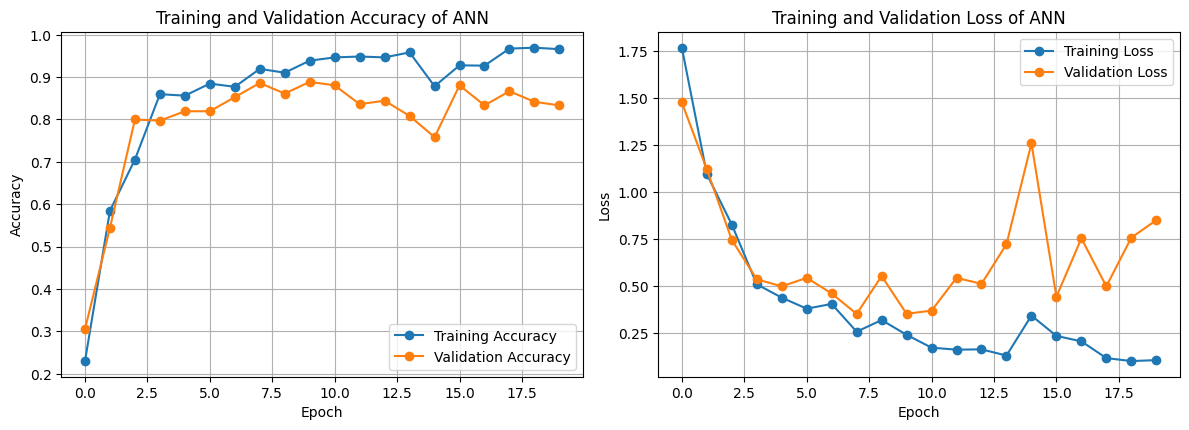

In [4]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (100, 100)  # adjust based on your image size
NUM_CLASSES = 6  # number of classes in your dataset
NUM_EPOCHS = 20

# Function to load images and labels from directories
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image and resize
            img = cv2.imread(img_path)
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img)
            labels.append(class_folder)
    return np.array(images), np.array(labels)


# Define your actual directory paths
train_data_dir = "/kaggle/input/neu-surface-defect-database/NEU-DET/train/images"
validation_data_dir = "/kaggle/input/neu-surface-defect-database/NEU-DET/validation/images"

# Load training and validation data
train_images, train_labels = load_images_from_folder(train_data_dir)
val_images, val_labels = load_images_from_folder(validation_data_dir)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)

# Reshape images for DL models
train_images_dl = train_images.reshape(-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 3) / 255.0
val_images_dl = val_images.reshape(-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 3) / 255.0

# Function to plot performance metrics
def plot_metrics(algorithm, accuracy, precision, recall):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot([accuracy], marker='o', label='Accuracy')
    plt.xlabel(algorithm)
    plt.ylabel('Score')
    plt.title('Performance Metrics of ' + algorithm)
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot([precision], marker='o', label='Precision')
    plt.xlabel(algorithm)
    plt.ylabel('Score')
    plt.title('Performance Metrics of ' + algorithm)
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot([recall], marker='o', label='Recall')
    plt.xlabel(algorithm)
    plt.ylabel('Score')
    plt.title('Performance Metrics of ' + algorithm)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(train_images.reshape(len(train_images), -1), train_labels_encoded)
svm_pred = svm_model.predict(val_images.reshape(len(val_images), -1))

svm_accuracy = accuracy_score(val_labels_encoded, svm_pred)
svm_precision = precision_score(val_labels_encoded, svm_pred, average='weighted')
svm_recall = recall_score(val_labels_encoded, svm_pred, average='weighted')

print("SVM Accuracy:", svm_accuracy)
plot_metrics("SVM", svm_accuracy, svm_precision, svm_recall)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(train_images.reshape(len(train_images), -1), train_labels_encoded)
lr_pred = lr_model.predict(val_images.reshape(len(val_images), -1))

lr_accuracy = accuracy_score(val_labels_encoded, lr_pred)
lr_precision = precision_score(val_labels_encoded, lr_pred, average='weighted')
lr_recall = recall_score(val_labels_encoded, lr_pred, average='weighted')

print("Logistic Regression Accuracy:", lr_accuracy)
plot_metrics("Logistic Regression", lr_accuracy, lr_precision, lr_recall)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(train_images.reshape(len(train_images), -1), train_labels_encoded)
knn_pred = knn_model.predict(val_images.reshape(len(val_images), -1))

knn_accuracy = accuracy_score(val_labels_encoded, knn_pred)
knn_precision = precision_score(val_labels_encoded, knn_pred, average='weighted')
knn_recall = recall_score(val_labels_encoded, knn_pred, average='weighted')

print("K-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
plot_metrics("K-Nearest Neighbors (KNN)", knn_accuracy, knn_precision, knn_recall)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(train_images.reshape(len(train_images), -1), train_labels_encoded)
rf_pred = rf_model.predict(val_images.reshape(len(val_images), -1))

rf_accuracy = accuracy_score(val_labels_encoded, rf_pred)
rf_precision = precision_score(val_labels_encoded, rf_pred, average='weighted')
rf_recall = recall_score(val_labels_encoded, rf_pred, average='weighted')

print("Random Forest Accuracy:", rf_accuracy)
plot_metrics("Random Forest", rf_accuracy, rf_precision, rf_recall)

# Artificial Neural Network (ANN)
ann_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_images_dl, train_labels_encoded, epochs=NUM_EPOCHS, validation_data=(val_images_dl, val_labels_encoded))

ann_accuracy = history.history['accuracy'][-1]
ann_val_accuracy = history.history['val_accuracy'][-1]
ann_loss = history.history['loss'][-1]
ann_val_loss = history.history['val_loss'][-1]

print("ANN Accuracy:", ann_accuracy)

# Plotting ANN metrics
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of ANN')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Training Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of ANN')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
16/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1727 - loss: 2.1521

W0000 00:00:1715352774.839011     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1817 - loss: 1.9739

W0000 00:00:1715352775.799166     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.1877 - loss: 1.9488 - val_accuracy: 0.3139 - val_loss: 1.5511
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4217 - loss: 1.4634 - val_accuracy: 0.4361 - val_loss: 1.2405
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6804 - loss: 0.8517 - val_accuracy: 0.7778 - val_loss: 0.7433
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8430 - loss: 0.5184 - val_accuracy: 0.8278 - val_loss: 0.5466
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8389 - loss: 0.4325 - val_accuracy: 0.8500 - val_loss: 0.5523
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8795 - loss: 0.3529 - val_accuracy: 0.7944 - val_loss: 0.6607
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9369 - loss: 0.2288 - val_accuracy: 0.9028 - val_loss: 0.3112
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9469 - loss: 0.1924 - val_accuracy: 0.8944 - val_loss: 0.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


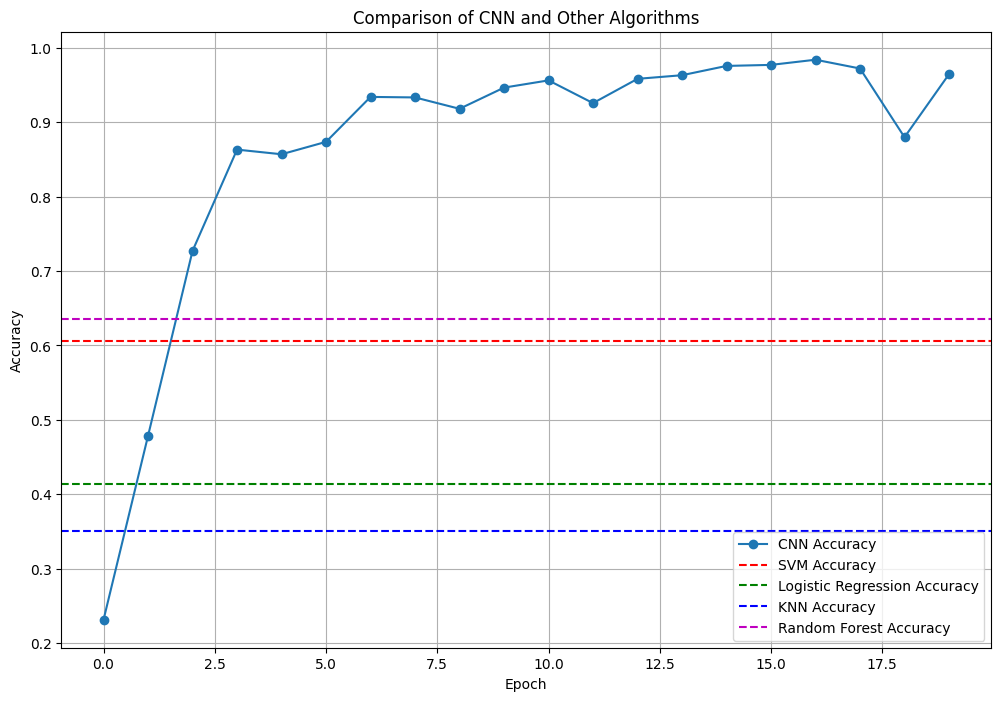

In [5]:
import numpy as np
import os
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (100, 100)  # adjust based on your image size
NUM_CLASSES = 6  # number of classes in your dataset
NUM_EPOCHS = 20
BATCH_SIZE = 32

# Function to load images and labels from directories
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image and resize
            img = cv2.imread(img_path)
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img)
            labels.append(class_folder)
    return np.array(images), np.array(labels)

# Define your actual directory paths
train_data_dir = "/kaggle/input/neu-surface-defect-database/NEU-DET/train/images"
validation_data_dir = "/kaggle/input/neu-surface-defect-database/NEU-DET/validation/images"

# Load training and validation data
train_images, train_labels = load_images_from_folder(train_data_dir)
val_images, val_labels = load_images_from_folder(validation_data_dir)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)

# Normalize pixel values
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile CNN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
history = model.fit(train_images, train_labels_encoded, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_images, val_labels_encoded))

# Calculate CNN model metrics
cnn_accuracy = history.history['accuracy'][-1]
cnn_val_accuracy = history.history['val_accuracy'][-1]
cnn_loss = history.history['loss'][-1]
cnn_val_loss = history.history['val_loss'][-1]

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(train_images.reshape(len(train_images), -1), train_labels_encoded)
svm_pred = svm_model.predict(val_images.reshape(len(val_images), -1))
svm_accuracy = accuracy_score(val_labels_encoded, svm_pred)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(train_images.reshape(len(train_images), -1), train_labels_encoded)
lr_pred = lr_model.predict(val_images.reshape(len(val_images), -1))
lr_accuracy = accuracy_score(val_labels_encoded, lr_pred)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(train_images.reshape(len(train_images), -1), train_labels_encoded)
knn_pred = knn_model.predict(val_images.reshape(len(val_images), -1))
knn_accuracy = accuracy_score(val_labels_encoded, knn_pred)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(train_images.reshape(len(train_images), -1), train_labels_encoded)
rf_pred = rf_model.predict(val_images.reshape(len(val_images), -1))
rf_accuracy = accuracy_score(val_labels_encoded, rf_pred)

# Plotting
plt.figure(figsize=(12, 8))

# Plot CNN accuracy
plt.plot(history.history['accuracy'], marker='o', label='CNN Accuracy')

# Plot other algorithms' accuracy
plt.axhline(y=svm_accuracy, color='r', linestyle='--', label='SVM Accuracy')
plt.axhline(y=lr_accuracy, color='g', linestyle='--', label='Logistic Regression Accuracy')
plt.axhline(y=knn_accuracy, color='b', linestyle='--', label='KNN Accuracy')
plt.axhline(y=rf_accuracy, color='m', linestyle='--', label='Random Forest Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Comparison of CNN and Other Algorithms')
plt.legend()
plt.grid(True)
plt.show()